<a href="https://colab.research.google.com/github/Zienab1/The_Sparks_Foundation_Tasks/blob/main/Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
data.shape

(25, 2)

In [37]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [38]:
data.duplicated().sum()

0

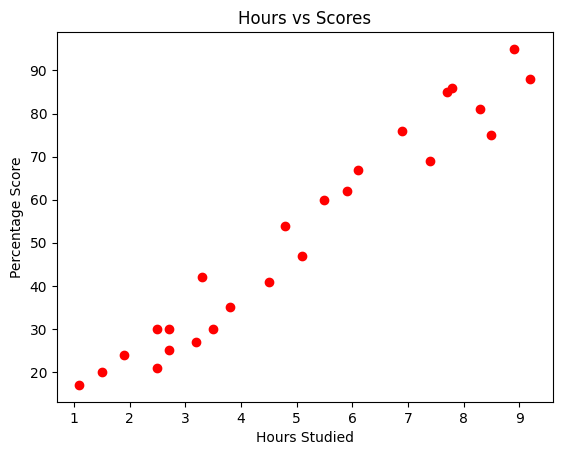

<class 'numpy.ndarray'>


In [48]:
x=data["Hours"].values
y=data["Scores"].values.reshape(-1,1)
plt.scatter(x,y,color="red")
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
print(type(y))

In [40]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

 Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting Simple Linear Regression to the Training set

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

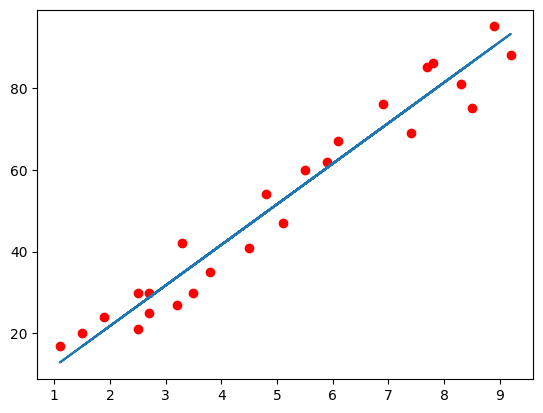

In [43]:
# Plotting the regression line
line = reg.coef_ * X + reg.intercept_

# Plotting for the test data
plt.scatter(X, y,color="red")
plt.plot(X, line);

plt.show()

In [44]:
# Predicting the Test set results
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [45]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
# You can also test with your own data
hours = 9.25
score_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = %.2f" % score_pred[0])

No of Hours = 9.25
Predicted Score = 93.69


**Evaluating the model**

Evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [47]:
from sklearn import metrics

# The mean absolute error
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.18
Mean squared error: 21.60
Coefficient of determination: 0.95
